In this guided project, we will perform some machine learning  to predict a car's market price using its attributes. The data set that we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv('imports-85.data', header=0)
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It looks like this data set does not include column names, so we will have to make them ourselves using the documenation.

In [3]:
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type',
        'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length',
        'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
        'stroke', 'compression-rate', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=columns)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Usually we cannot have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the "normalized-losses" column contains missing values represented by "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [4]:
cars = cars.replace('?', np.nan)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-nul

In [5]:
cars['horsepower'] = cars['horsepower'].astype(float)

In [6]:
cars['price'] = cars['price'].astype(float)

In [7]:
cars['peak-rpm'] = cars['peak-rpm'].astype(float)

In [8]:
cars['stroke'] = cars['stroke'].astype(float)

In [9]:
cars['bore'] = cars['bore'].astype(float)

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-n

Now let's examine whether we should drop or replace any NaNs or drop any columns.  We'll also try to filter the data set so that we have only continuous features, for the sake of simplicity.

In [11]:
cars['normalized-losses']

0      NaN
1      NaN
2      NaN
3      164
4      164
5      NaN
6      158
7      NaN
8      158
9      NaN
10     192
11     192
12     188
13     188
14     NaN
15     NaN
16     NaN
17     NaN
18     121
19      98
20      81
21     118
22     118
23     118
24     148
25     148
26     148
27     148
28     110
29     145
      ... 
175     65
176     65
177     65
178    197
179    197
180     90
181    NaN
182    122
183    122
184     94
185     94
186     94
187     94
188     94
189    NaN
190    256
191    NaN
192    NaN
193    NaN
194    103
195     74
196    103
197     74
198    103
199     74
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [12]:
con_cars = cars.drop(['normalized-losses','make','fuel-type',
             'aspiration','num-of-doors','engine-type','num-of-cylinders',
             'body-style','drive-wheels','engine-location','fuel-system'], axis=1)

In [13]:
con_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling           205 non-null int64
wheel-base          205 non-null float64
length              205 non-null float64
width               205 non-null float64
height              205 non-null float64
curb-weight         205 non-null int64
engine-size         205 non-null int64
bore                201 non-null float64
stroke              201 non-null float64
compression-rate    205 non-null float64
horsepower          203 non-null float64
peak-rpm            203 non-null float64
city-mpg            205 non-null int64
highway-mpg         205 non-null int64
price               201 non-null float64
dtypes: float64(10), int64(5)
memory usage: 24.1 KB


In [14]:
con_cars.dropna(subset=['price']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
symboling           201 non-null int64
wheel-base          201 non-null float64
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
curb-weight         201 non-null int64
engine-size         201 non-null int64
bore                197 non-null float64
stroke              197 non-null float64
compression-rate    201 non-null float64
horsepower          199 non-null float64
peak-rpm            199 non-null float64
city-mpg            201 non-null int64
highway-mpg         201 non-null int64
price               201 non-null float64
dtypes: float64(10), int64(5)
memory usage: 25.1 KB


In [15]:
con_cars = con_cars.dropna(subset=['price'])
con_cars.fillna(con_cars.mean()).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
symboling           201 non-null int64
wheel-base          201 non-null float64
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
curb-weight         201 non-null int64
engine-size         201 non-null int64
bore                201 non-null float64
stroke              201 non-null float64
compression-rate    201 non-null float64
horsepower          201 non-null float64
peak-rpm            201 non-null float64
city-mpg            201 non-null int64
highway-mpg         201 non-null int64
price               201 non-null float64
dtypes: float64(10), int64(5)
memory usage: 25.1 KB


In [16]:
con_cars = con_cars.fillna(con_cars.mean())
con_cars.isnull().sum()

symboling           0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-size         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

We have now filtered the data set of all null values and non-continuous features.  Now let's try to rescale all of the remaining values using a min-max normalization.

In [17]:
price_col = con_cars['price']
con_cars = (con_cars - con_cars.min())/(con_cars.max() - con_cars.min())
con_cars['price'] = price_col
con_cars.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


We have preserved the original prices as those will be our target values.

Now we will start building some models.  We will start with simple univariate models using a 75/25 train-test split.

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [19]:
def knn_train_test(df, training_col, target_col):
    #shuffling the data set
    shuffle = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle)
    
    train_df = rand_df.iloc[:int(len(df) * 0.75)]
    test_df = rand_df.iloc[int(len(df) * 0.75):]
    knn = KNeighborsRegressor()
    knn.fit(train_df[[training_col]], train_df[target_col])
    predictions = knn.predict(test_df[[training_col]])
    return np.sqrt(mean_squared_error(predictions, test_df[target_col]))

We will start by trying to predict car prices based on each of a car's horsepower, city MPG, and highway MPG.

In [20]:
horsepower_rmse = knn_train_test(con_cars, 'horsepower', 'price')
citympg_rmse = knn_train_test(con_cars, 'city-mpg', 'price')
hwmpg_rmse = knn_train_test(con_cars, 'highway-mpg', 'price')

print(horsepower_rmse, citympg_rmse, hwmpg_rmse)

3099.657412315995 4095.779664914778 3186.012256540067


This shows us that our model training function is working properly and that our RMSEs are in the expected range.  Now let's train a model on each feature in the data set.

In [21]:
training_cols = con_cars.drop('price', axis=1).columns
rmses = {}

for column in training_cols:
    rmses[column] = knn_train_test(con_cars, column, 'price')

rmses_series = pd.Series(rmses)
rmses_series.sort_values()

engine-size         3449.848410
width               3595.926264
horsepower          4529.799058
city-mpg            4651.444892
curb-weight         4711.033213
highway-mpg         4782.577550
wheel-base          5473.126341
compression-rate    5946.882504
bore                6244.918987
length              6854.169615
peak-rpm            7213.766338
height              7862.214600
stroke              8113.529648
symboling           8933.546505
dtype: float64

One thing that we can note immediately is the high variance of these models; comparing the three models that we trained before to the three models that we have just trained using the same input features, the RMSEs vary considerably.  We will try to tweak these models right now by editing our function above with a new hyperparameter to tune the K-value.

In [22]:
def knn_train_test(df, training_col, target_col, k):
    #shuffling the data set
    shuffle = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle)
    
    train_df = rand_df.iloc[:int(len(df) * 0.75)]
    test_df = rand_df.iloc[int(len(df) * 0.75):]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[training_col]], train_df[target_col])
    predictions = knn.predict(test_df[[training_col]])
    return np.sqrt(mean_squared_error(predictions, test_df[target_col]))

In [29]:
from collections import OrderedDict
training_cols = con_cars.drop('price', axis=1).columns
rmses = {}
ks = [1,3,5,7,9]

for column in training_cols:
    rmses[column] = OrderedDict()
for column in training_cols:    
    for k in ks:
        rmses[column][k] = knn_train_test(con_cars, column, 'price', k)

rmses

{'bore': OrderedDict([(1, 6827.951118057908),
              (3, 5321.469291100156),
              (5, 6576.545701023224),
              (7, 8472.540473271785),
              (9, 7243.900166293052)]),
 'city-mpg': OrderedDict([(1, 4702.164682981908),
              (3, 3746.048660448607),
              (5, 3875.2857529047665),
              (7, 4264.0189292463965),
              (9, 4342.484440579928)]),
 'compression-rate': OrderedDict([(1, 8065.237738858894),
              (3, 7308.827525640777),
              (5, 6302.950148533777),
              (7, 7219.661726215181),
              (9, 6671.200683927777)]),
 'curb-weight': OrderedDict([(1, 5466.054949036128),
              (3, 4904.293739447981),
              (5, 5163.766637168769),
              (7, 4835.36251785444),
              (9, 3774.642878675377)]),
 'engine-size': OrderedDict([(1, 3742.1612477178974),
              (3, 3384.7705070832967),
              (5, 3678.798578713586),
              (7, 3486.916629492654),
       

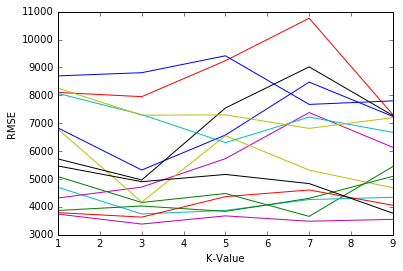

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in rmses.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('K-Value')
    plt.ylabel('RMSE')

It looks like some K-values along with certain features can deliver better results than other K/feature pairs.

Now let's try building some multivariate models.  We will build four models, each increasing in input features.

In [35]:
def knn_train_test(df, training_cols, target_col, k=3):
    #shuffling the data set
    shuffle = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle)
    
    train_df = rand_df.iloc[:int(len(df) * 0.75)]
    test_df = rand_df.iloc[int(len(df) * 0.75):]
    knn = KNeighborsRegressor()
    knn.fit(train_df[training_cols], train_df[target_col])
    predictions = knn.predict(test_df[training_cols])
    return np.sqrt(mean_squared_error(predictions, test_df[target_col]))

In [34]:
two_rmse = knn_train_test(con_cars, ['engine-size','city-mpg'],'price')
three_rmse = knn_train_test(con_cars, ['engine-size','city-mpg','horsepower'],'price')
four_rmse = knn_train_test(con_cars, ['width','city-mpg','horsepower','width'],'price')
five_rmse = knn_train_test(con_cars, ['width','city-mpg','horsepower','width','highway-mpg'],'price')

print(two_rmse,three_rmse,four_rmse,five_rmse)

3079.5755552972414 3476.683101609867 3538.3492032191466 3087.7454282702647


Interestingly, the two-feature model had the lowest RMSE using engine size and city MPG as inputs, but the RMSE increased with the three- and four-feature models, and then finally decreased again significantly with the five-feature model, where we added highway MPG.  This could suggest that highway MPG is more correlated to the price than either horsepower or width.

Let's try to optimize those two models by varying the K-value.

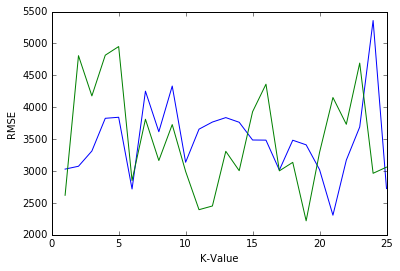

In [36]:
rmses_two = [knn_train_test(con_cars, ['engine-size','city-mpg'], 'price', i) for i in range(1,26)]
rmses_five = [knn_train_test(con_cars, ['width','city-mpg','horsepower','width','highway-mpg'], 'price', i) for i in range(1,26)]

x = [x for x in range(1,26)]
plt.plot(x, rmses_two)
plt.plot(x, rmses_five)
plt.xlabel('K-Value')
plt.ylabel('RMSE')

One model seems to perform well at a K-value of 11 or 19, but the other seems to perform best at only 21.  This could be due to the number of significant features being different between the two; the more significant features are used for training, the lower the K-value can be, presumably.